In [35]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score

In [39]:
X, y = datasets.make_classification(n_samples=5000, n_features=30, 
                                    n_informative = 25, n_classes = 2, n_clusters_per_class=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, random_state = 2016)


In [44]:
recalls = []
precisions = [] 

for i in range(20):
    X_new = SelectKBest(f_regression, k = 30-i).fit_transform(X, y)
    model = GaussianNB()
    model.fit(X_new, y)
    recalls.append(recall_score(model.predict(X_new), y))
    precisions.append(precision_score(model.predict(X_new), y))

In [42]:
def plot_rec_prec(precisions, recalls):
    plt.figure(figsize=(10,7))
    plt.plot(range(20), recalls, color = 'r', label="recalls")
    plt.plot(range(20), precisions, color = 'b', label = "precisions")
    plt.legend()
    plt.show()

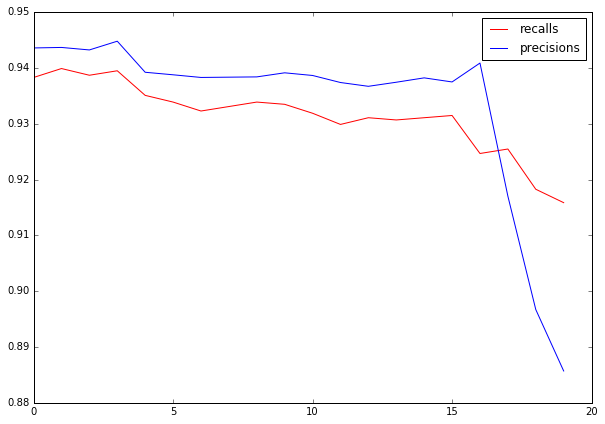

In [45]:
plot_rec_prec(recalls, precisions)

In [41]:
recalls = []
precisions = [] 

for i in range(20):
    model = KNeighborsClassifier(n_neighbors = i + 1)
    model.fit(X, y)
    recalls.append(recall_score(model.predict(X), y))
    precisions.append(precision_score(model.predict(X), y))

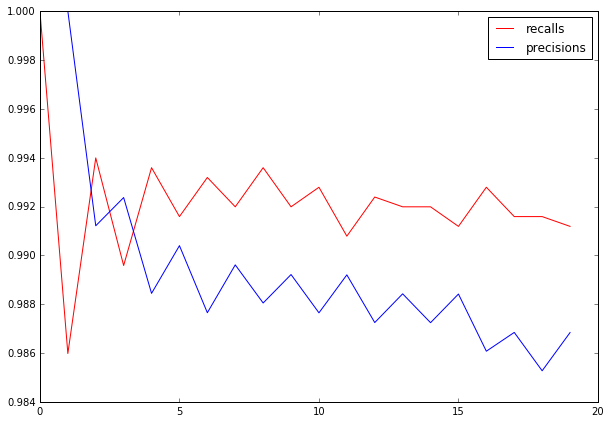

In [43]:
plot_rec_prec(recalls, precisions)